# Overfitting Problem
#### Here you need to create a model that overfits, then use different methods to avoid it

### Import libraries

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Generate Sample Data

In [3]:
# This function generates random data for 2 different classes

# np.random.seed(0xdeadbeef)

def make_sample(nexamples, means=([0.,0.],[1.,1.]), sigma=1.):
    normal = np.random.multivariate_normal
    # squared width:
    s2 = sigma**2.
    # below, we provide the coordinates of the mean as 
    # a first argument, and then the covariance matrix
    # which describes the width of the Gaussian along the 
    # two directions.
    # we generate nexamples examples for each category
    sgx0 = normal(means[0], [[s2, 0.], [0.,s2]], nexamples)
    sgx1 = normal(means[1], [[s2, 0.], [0.,s2]], nexamples)
    # setting the labels for each category
    sgy0 = np.zeros((nexamples,))
    sgy1 = np.ones((nexamples,))
    sgx = np.concatenate([sgx0,sgx1])
    sgy = np.concatenate([sgy0,sgy1])
    return sgx, sgy

In [91]:
# Don't change the number of samples for your first model.
# After that (For your second model) you can play with the numbers to see how increasing your dataset helps to avoid overfitting

sgx, sgy = make_sample(30)

Text(0, 0.5, 'x2')

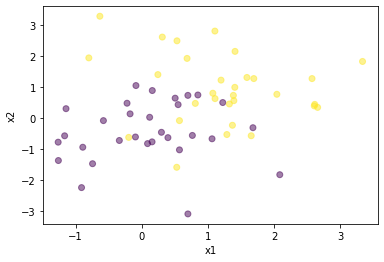

In [92]:
# note how the two categories are plotted
# together in one go by providing the 
# label array as color argument (c=sgy)

plt.scatter(sgx[:,0], sgx[:,1], alpha=0.5, c=sgy)
plt.xlabel('x1')
plt.ylabel('x2')

### Import Keras

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input, Flatten
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import L1, L2, L1L2

### Create a model that overfits

In [93]:
# Create a Sequential MLP model with these Dense layers:
# 3 hidden layers with 50 units each and 'relu' activation
# 1 unit output with 'sigmoid' activation

model = Sequential()

# Hidden Layer
model.add(Dense(units=50, activation="relu"))
model.add(Dense(units=50, activation="relu"))
model.add(Dense(units=50, activation="relu"))

# Output Layer
model.add(Dense(units=1, activation="sigmoid"))

In [94]:
# Split your dataset to test and train with your desired implementation
# use sklearn.model_selection.train_test_split

x_train, x_test, y_train, y_test = train_test_split(sgx, sgy, test_size=0.33)

In [95]:
# Compile with your desired optimizer and loss function with 'accuracy' as metric
# Don't forget to monitor the overfitting, you should take care of val_accuracy and val_loss

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam', 
    metrics = ['accuracy']
)

In [96]:
# Start training and fit your model with desired parameters and validation_split=0.2

history = model.fit(
    x = sgx,
    y = sgy,
    epochs = 50,
    validation_split = 0.2,
    verbose=0,
)

### Plot Your Results

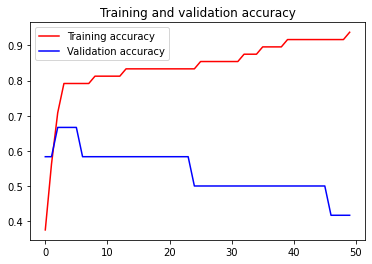

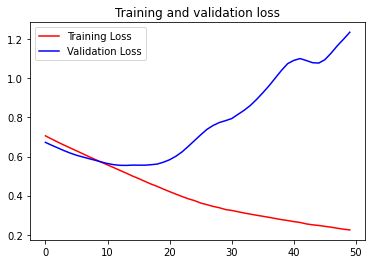

In [97]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluate your model

In [98]:
# Evaluate your model with train and test data

train_evaluate = model.evaluate(x_train, y_train)
print("Train evaluation is: ", train_evaluate)

test_evaluate = model.evaluate(x_test, y_test)
print("Test evaluation is: ", test_evaluate)

2/2 [==============================] - 0s 7ms/step - loss: 0.3719 - accuracy: 0.8500
Train evaluation is:  [0.3718905448913574, 0.8500000238418579]
1/1 [==============================] - 0s 24ms/step - loss: 0.5290 - accuracy: 0.8000
Test evaluation is:  [0.5290249586105347, 0.800000011920929]


# Now you need to use your knowledge and methods (Regularization, Dropout, etc) to prevent overfitting and then evaluate and compare your results

Hyperparameters

In [4]:
l1 = 0.0005
l2 = 0.005
p = 0.5

Text(0, 0.5, 'x2')

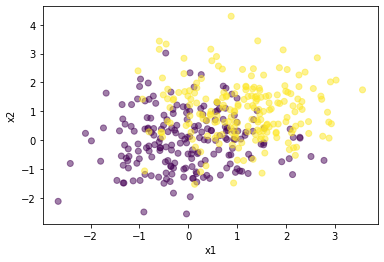

In [69]:
sgx, sgy = make_sample(200)

plt.scatter(sgx[:,0], sgx[:,1], alpha=0.5, c=sgy)
plt.xlabel('x1')
plt.ylabel('x2')

In [70]:
model = Sequential([
  Dense(32, activation='relu', kernel_regularizer=L1L2(l1, l2)),
  Dropout(p),
  Dense(16, activation='relu', kernel_regularizer=L1L2(l1, l2)),
  Dropout(p),
  Dense(1, activation='sigmoid', kernel_regularizer=L1L2(l1, l2)),
])

In [71]:
x_train, x_test, y_train, y_test = train_test_split(sgx, sgy, test_size=0.1)

In [72]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam', 
    metrics = ['accuracy']
)

In [73]:
history = model.fit(
    x = sgx,
    y = sgy,
    epochs = 50,
    validation_split = 0.2,
    verbose=0,
)

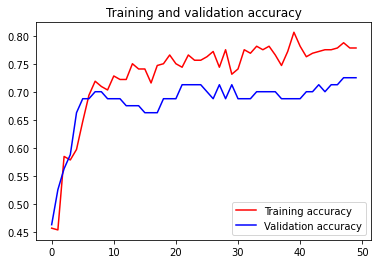

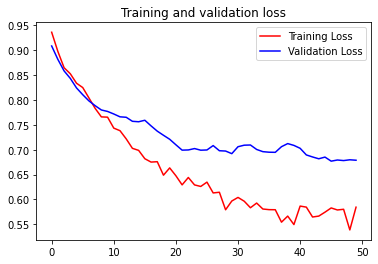

In [74]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [75]:
train_evaluate = model.evaluate(x_train, y_train)
print("Train evaluation is: ", train_evaluate)

test_evaluate = model.evaluate(x_test, y_test)
print("Test evaluation is: ", test_evaluate)

12/12 [==============================] - 0s 2ms/step - loss: 0.5536 - accuracy: 0.7833
Train evaluation is:  [0.5535984635353088, 0.7833333611488342]
2/2 [==============================] - 0s 6ms/step - loss: 0.4980 - accuracy: 0.8500
Test evaluation is:  [0.49796637892723083, 0.8500000238418579]
